In [22]:
from brainclip.config import experiments_folder
import pandas as pd

jsonfile = experiments_folder+"test_matches.json"

In [54]:
import json
with open(jsonfile, 'r') as f:
    data = json.load(f)

df = []
for key, value in data.items():
    d = pd.json_normalize(pd.DataFrame(value)["matches"])
    indexes = list(d.index) 
    for idx in indexes:
        #multi_index = pd.MultiIndex.from_tuples([(idx, key) for idx in indexes], names=['match', 'image'])
        #d.index = multi_index
        d.index = zip(indexes, [key] * len(indexes) )
        d.index = [f"{i}_{j}" for i,j in d.index]
    df.append(d)

df = pd.concat(df, axis=0)
df

,image_path,report,score,rank
0_image_985.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Late sub acute infarct in right corona radiata...,0.6845741,6
0_image_236.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,No significant abnormality is seen in the brain.,0.5054931,10
1_image_236.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,No significant abnormality is seen in the brain.,0.019939207,18
2_image_236.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,No significant abnormality is seen in the brain.,-0.005595913,19
3_image_236.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,No significant abnormality is seen in the brain.,0.76722,3
0_image_793.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.93506944,2
0_image_258.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Normal study of brain. No acute infarcts / hae...,0.42379314,9
0_image_984.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.76703054,8
0_image_555.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Few non-specific T2 FLAIR white matter hyperin...,0.8029462,5
0_image_1084.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.8066151,7


In [112]:
df = df[df.index.str.startswith('0')]
df["rank"] = df["rank"].astype(int)
df["score"] = df["score"].astype(float)

df

,image_path,report,score,rank
0_image_985.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Late sub acute infarct in right corona radiata...,0.684574,6
0_image_236.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,No significant abnormality is seen in the brain.,0.505493,10
0_image_793.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.935069,2
0_image_258.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Normal study of brain. No acute infarcts / hae...,0.423793,9
0_image_984.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.767031,8
0_image_555.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Few non-specific T2 FLAIR white matter hyperin...,0.802946,5
0_image_1084.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.806615,7
0_image_887.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Partially empty sella.,-0.427694,23
0_image_110.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Grade I global cortical atrophy with scattered...,-0.142878,16
0_image_632.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Small focal area of restricted diffusion is se...,-0.059836,20


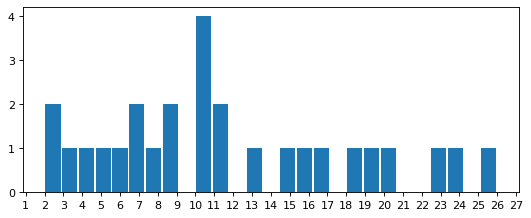

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3), dpi=80)
plt.hist(df["rank"], bins=27, rwidth=0.9)
plt.xticks(range(1,len(df["rank"])+1))
plt.show()

In [114]:
df[df["rank"] <= 5]

,image_path,report,score,rank
0_image_793.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Chronic ischemic small vessel changes in bilat...,0.935069,2
0_image_555.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Few non-specific T2 FLAIR white matter hyperin...,0.802946,5
0_image_987.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Follow up case of congenital hydrocephalus due...,0.953028,2
0_image_989.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,No significant abnormality in the brain. Hypop...,0.905002,3
0_image_87.nii.gz,[/datadrive_m2/alice/brain-CLIP/data/test/imag...,Grade II global cortical atrophy with scattere...,0.826134,4


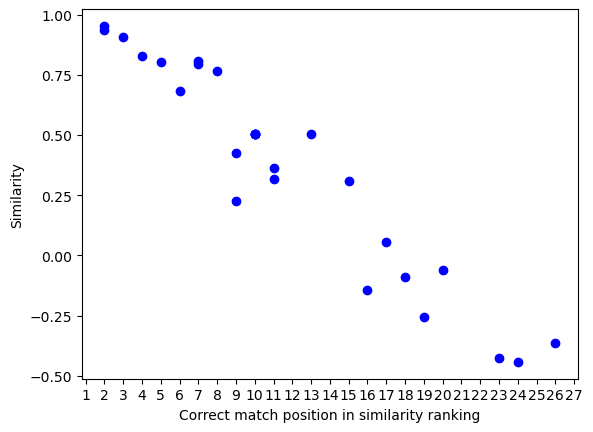

In [129]:
import numpy as np
s_df = df.sort_values("rank", ascending=False)
plt.plot(s_df["rank"], s_df["score"], 'bo',)
plt.yticks(np.arange(start=-0.5,stop=1.25,step=0.25))
plt.xticks(np.arange(start=1,stop=28,step=1))
plt.xlabel("Correct match position in similarity ranking")
plt.ylabel("Similarity")
plt.show()